In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
train_dir = '/Users/kavleenkaur/Downloads/kavi/internshala deep learning/Osteoarthritis_Assignment_dataset/train'

In [7]:
valid_dir = '/Users/kavleenkaur/Downloads/kavi/internshala deep learning/Osteoarthritis_Assignment_dataset/Valid'
test_dir = '/Users/kavleenkaur/Downloads/kavi/internshala deep learning/Osteoarthritis_Assignment_dataset/test'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.
Found 845 images belonging to 2 classes.


In [14]:
from tensorflow.keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

87910968/87910968 [==============================] - 7s 0us/step


In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
conv_base.trainable = False

In [19]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [20]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=110,
      epochs=10,
      validation_data=valid_generator,
      validation_steps=30)

Epoch 1/10


/var/folders/kk/xmhwr_2d78l5dsqlkws2vy880000gn/T/ipykernel_4400/1349058306.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


110/110 [==============================] - 22s 190ms/step - loss: 0.5566 - acc: 0.7068 - val_loss: 0.3632 - val_acc: 0.8683
Epoch 2/10
110/110 [==============================] - 21s 192ms/step - loss: 0.4368 - acc: 0.7804 - val_loss: 0.3949 - val_acc: 0.8017
Epoch 3/10
110/110 [==============================] - 22s 195ms/step - loss: 0.4333 - acc: 0.7959 - val_loss: 0.2742 - val_acc: 0.8900
Epoch 4/10
110/110 [==============================] - 22s 200ms/step - loss: 0.4078 - acc: 0.8068 - val_loss: 0.2860 - val_acc: 0.8733
Epoch 5/10
110/110 [==============================] - 22s 198ms/step - loss: 0.4162 - acc: 0.8096 - val_loss: 0.2342 - val_acc: 0.9133
Epoch 6/10
110/110 [==============================] - 23s 207ms/step - loss: 0.4096 - acc: 0.8050 - val_loss: 0.2300 - val_acc: 0.9100
Epoch 7/10
110/110 [==============================] - 22s 203ms/step - loss: 0.3893 - acc: 0.8123 - val_loss: 0.2427 - val_acc: 0.9100
Epoch 8/10
110/110 [==============================] - 22s 204ms/st

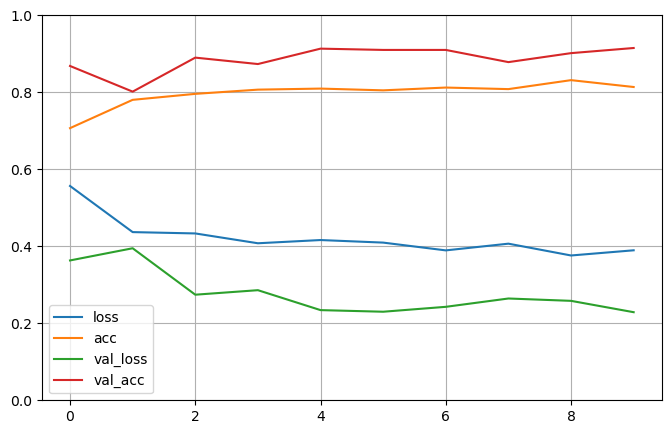

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(test_generator, steps=20)

20/20 [==============================] - 3s 134ms/step - loss: 2.7924 - acc: 0.3850


[2.7923784255981445, 0.38499999046325684]

# InceptionResNetV2 (cats & dogs)

In [24]:
train_dir = '/Users/kavleenkaur/Downloads/kavi/internshala deep learning/Data set, Presentation and Python Notebook for Image recognition project module/cats_and_dogs/train'
valid_dir = '/Users/kavleenkaur/Downloads/kavi/internshala deep learning/Data set, Presentation and Python Notebook for Image recognition project module/cats_and_dogs/validation'
test_dir = '/Users/kavleenkaur/Downloads/kavi/internshala deep learning/Data set, Presentation and Python Notebook for Image recognition project module/cats_and_dogs/test'

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
from tensorflow.keras.applications import InceptionResNetV2 

conv_base = InceptionResNetV2 (weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

219055592/219055592 [==============================] - 15s 0us/step


In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers

model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [29]:
conv_base.trainable = False

In [30]:
from tensorflow.keras import optimizers

model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [32]:
history = model2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=valid_generator,
      validation_steps=50)

Epoch 1/10


/var/folders/kk/xmhwr_2d78l5dsqlkws2vy880000gn/T/ipykernel_4400/2667359688.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(


100/100 [==============================] - 48s 478ms/step - loss: 0.1940 - acc: 0.9310 - val_loss: 0.0728 - val_acc: 0.9760
Epoch 2/10
100/100 [==============================] - 49s 489ms/step - loss: 0.1569 - acc: 0.9440 - val_loss: 0.0760 - val_acc: 0.9760
Epoch 3/10
100/100 [==============================] - 50s 504ms/step - loss: 0.1489 - acc: 0.9440 - val_loss: 0.0683 - val_acc: 0.9710
Epoch 4/10
100/100 [==============================] - 55s 553ms/step - loss: 0.1337 - acc: 0.9470 - val_loss: 0.0745 - val_acc: 0.9710
Epoch 5/10
100/100 [==============================] - 59s 593ms/step - loss: 0.1392 - acc: 0.9485 - val_loss: 0.0769 - val_acc: 0.9720
Epoch 6/10
100/100 [==============================] - 59s 589ms/step - loss: 0.1286 - acc: 0.9480 - val_loss: 0.0618 - val_acc: 0.9710
Epoch 7/10
100/100 [==============================] - 58s 577ms/step - loss: 0.1287 - acc: 0.9490 - val_loss: 0.0582 - val_acc: 0.9770
Epoch 8/10
100/100 [==============================] - 58s 577ms/st

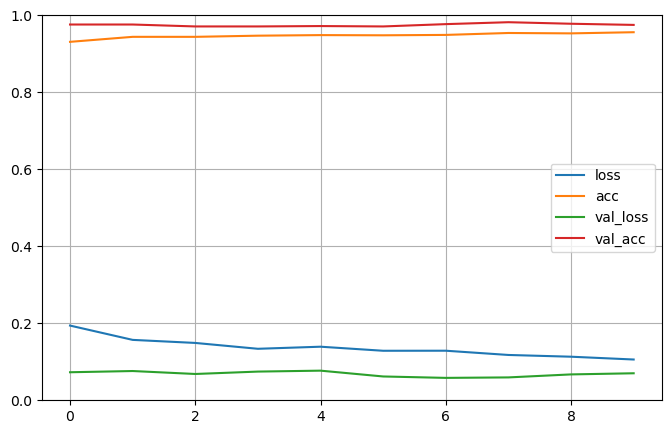

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(test_generator, steps=20)

20/20 [==============================] - 3s 131ms/step - loss: 9.2604 - acc: 0.4500


[9.260383605957031, 0.44999998807907104]